

# Taller: Análisis de Hipótesis con Datos de la ENS 2016-2017



## 1. Introducción



En investigación cuantitativa, la docimacia de hipótesis (o prueba de hipótesis) permite evaluar si las diferencias observadas en los datos pueden atribuirse al azar o reflejan patrones reales en la población. Este taller tiene como objetivo introducir herramientas estadísticas para comprobar hipótesis en datos reales, utilizando Python como herramienta de análisis.



A partir de la Encuesta Nacional de Salud (ENS) 2016-2017, trabajaremos con variables demográficas, biométricas y clínicas para:

- Verificar supuestos de normalidad.

- Comparar variables entre grupos (por ejemplo, hombres vs. mujeres).

- Analizar diferencias en variables continuas y categóricas.



Este análisis es clave para evaluar desigualdades en salud, diseñar políticas basadas en evidencia y generar conclusiones confiables a partir de datos poblacionales.



## 2. Objetivos

Al finalizar este taller, los y las estudiantes serán capaces de:



* Evaluar la normalidad de variables cuantitativas

- Verificar normalidad en variables como Edad, Peso, Talla, Glicemia y Colesterol.

* Comparar variables continuas entre grupos

- Aplicar pruebas t de Student para muestras independientes (hombres vs. mujeres).

- Comparar variables como Peso, IMC, y Glicemia por sexo.

* Comparar variables categóricas u ordinales

- Evaluar diferencias en número de comorbilidades o nivel educacional entre grupos.

- Utilizar pruebas como chi-cuadrado o pruebas no paramétricas.

* Interpretar resultados

- Comprender el significado de los valores p.

- Formular y contrastar hipótesis nula y alternativa.

- Traducir los resultados estadísticos en hallazgos interpretables en contexto de salud pública.



## 3. Dataset



La Encuesta Nacional de Salud (ENS) 2016-2017 es un estudio representativo de la población chilena que recopila datos sobre salud física y mental, factores de riesgo, estilo de vida y uso de servicios sanitarios. Esta información permite caracterizar el estado de salud y sus determinantes a nivel nacional.En este taller trabajaremos con un subconjunto de variables relevantes para el análisis estadístico de hipótesis. Los datos son de acceso público y están disponibles en este repositorio. A través de este conjunto de datos, aprenderemos a aplicar pruebas estadísticas clásicas sobre variables reales, extrayendo conclusiones aplicables a la investigación en salud pública. Los datos se encuentran [disponibles públicamente](https://data.mendeley.com/datasets/3myh3nzcy3/1).

<div style="text-align:center;">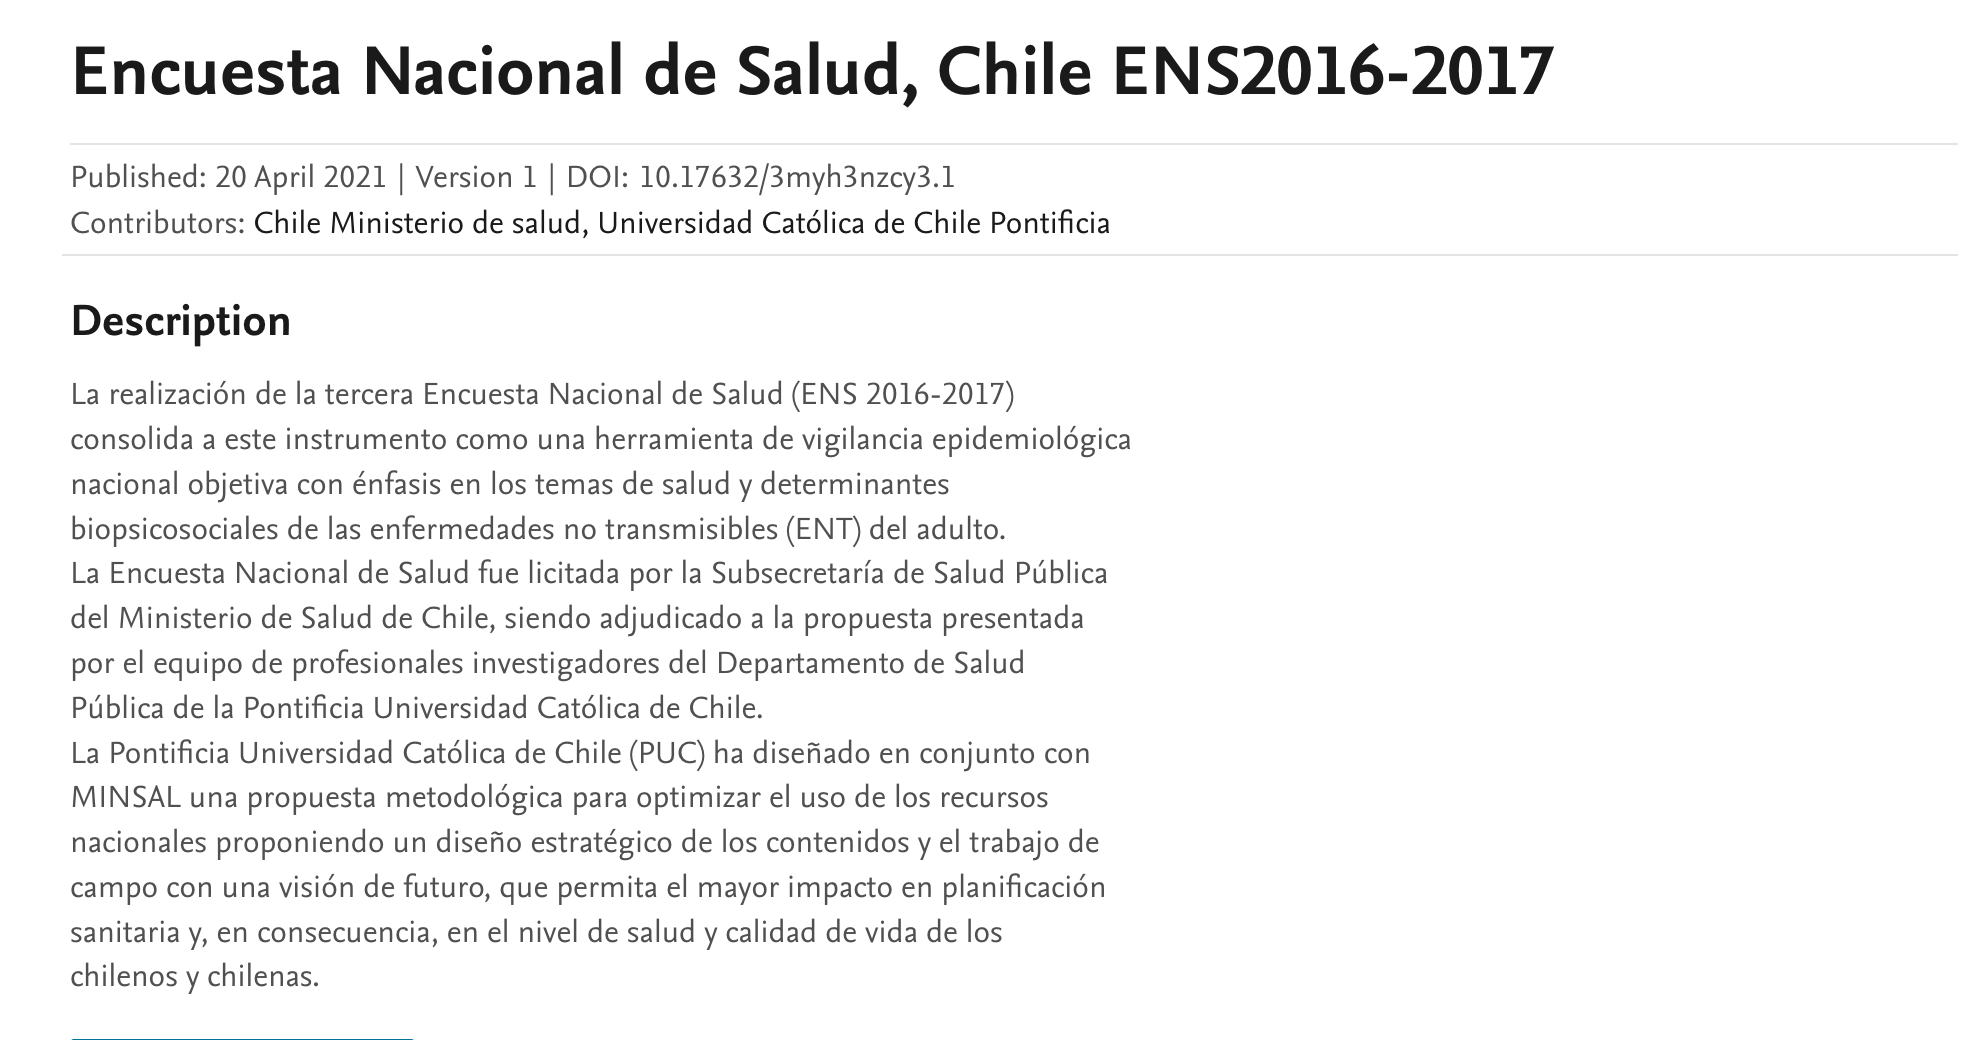</div>


### 3.1 Librerías necesarias
Las siguientes librerias son necesarias para el análisis de datos y visualización. 

In [1]:
%%capture
# Instalar librerias para leer archivos SPSS
!pip install pyreadstat

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

### 3.2 Cargar Datos

Tal como se realizo en el taller anterior, se descargara la base de datos utilizando `wget` y luego se cargara la base de datos en la variable `ens` utilizando la función de pandas `read_spss`.  

In [5]:
# Descargar ENS
!wget https://github.com/iHealthInstitute/Talleres_Diplomado_iHealth/raw/refs/heads/main/data/ENS2016-2017.sav

--2025-07-15 16:47:22--  https://github.com/iHealthInstitute/Talleres_Diplomado_iHealth/raw/refs/heads/main/data/ENS2016-2017.sav
Resolviendo github.com (github.com)... 20.201.28.151
Conectando con github.com (github.com)[20.201.28.151]:443... conectado.
Petición HTTP enviada, esperando respuesta... 302 Found
Localización: https://raw.githubusercontent.com/iHealthInstitute/Talleres_Diplomado_iHealth/refs/heads/main/data/ENS2016-2017.sav [siguiendo]
--2025-07-15 16:47:23--  https://raw.githubusercontent.com/iHealthInstitute/Talleres_Diplomado_iHealth/refs/heads/main/data/ENS2016-2017.sav
Resolviendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Conectando con raw.githubusercontent.com (raw.githubusercontent.com)[185.199.110.133]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 34441286 (33M) [application/octet-stream]
Grabando a: «ENS2016-2017.sav.3»

ENS2016-2017.sav.3  100%[==============

In [7]:
ens = pd.read_spss('ENS2016-2017.sav')
print(ens.head())
print(ens.shape)

   IdEncuesta  FechaInicioF1               Region    Comuna    Zona  \
0     20006.0   1.369894e+10  XIII. Metropolitana  Santiago  URBANA   
1     20008.0   1.369964e+10  XIII. Metropolitana  Santiago  URBANA   
2     20011.0   1.369955e+10  XIII. Metropolitana  Santiago  URBANA   
3     20012.0   1.369903e+10  XIII. Metropolitana  Santiago  URBANA   
4     20013.0   1.369902e+10  XIII. Metropolitana  Santiago  URBANA   

   IdSegmento  IdPersona_1      Ident7  Edad Edad_Codificada  ...  \
0  13101101.0        241.0  1977-12-18  38.0         25 - 44  ...   
1  13101101.0        197.0  1991-10-23  25.0         25 - 44  ...   
2  13101102.0        321.0  1996-05-31  20.0           15-24  ...   
3  13101102.0        245.0  1931-04-14  85.0             65+  ...   
4  13101102.0        242.0  1975-06-24  41.0         25 - 44  ...   

  fg_CKDschwartz_diminuido_60 fg_CKDschwartz_diminuido_30 Fechaini_F1  \
0                         NaN                         NaN  2016-11-19   
1           

## 4 Test de normalidad

En estadística inferencial, muchas de las pruebas más utilizadas —como la t de Student, el ANOVA y los intervalos de confianza— se basan en un supuesto fundamental: que las variables que analizamos siguen una distribución normal (también llamada distribución gaussiana o de campana). Este supuesto afecta directamente la validez de los resultados.

Verificar la normalidad nos permite:
* Determinar si podemos aplicar pruebas paramétricas, que suelen ser más potentes y precisas.
* Evitar errores al interpretar p-valores o al calcular promedios y desviaciones estándar.
* Decidir si necesitamos transformar los datos o usar pruebas no paramétricas alternativas (como Mann-Whitney o Kruskal-Wallis).

La forma tipica de una variable que distribute normal se puede observar en la siguiente figura:

![](img/normal_dist.png)

Es de mucha utilidad visualizar los datos mediante su histograma para entender el comportamiento de estos.


#### **Ejercicio 1** 

Utiliza histogramas para comprar la normalidad de las variables: `edad`, `Colesterol_HDL`, `Glucosa`, `IMC` y `Microalbuminuria_Creatinina`. Crea un plot para cada variable modificando la cantidad de bins segun sea necesario. Responde:
* ¿Que variables parecen distribuir normal?
* ¿Que sucede en variables como la creatinina?
* En base solo a los histogramas, ¿Podemos asegurar normalidad de los datos?





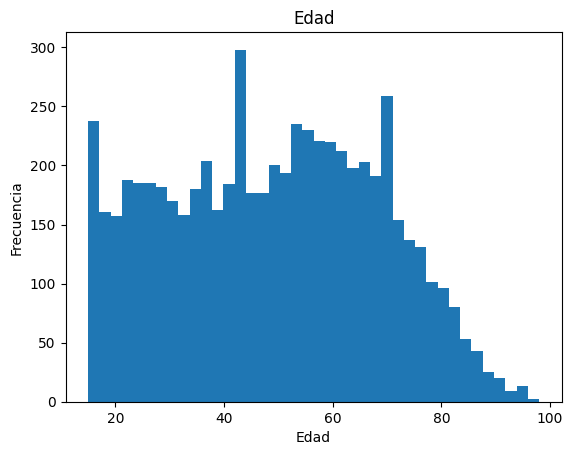

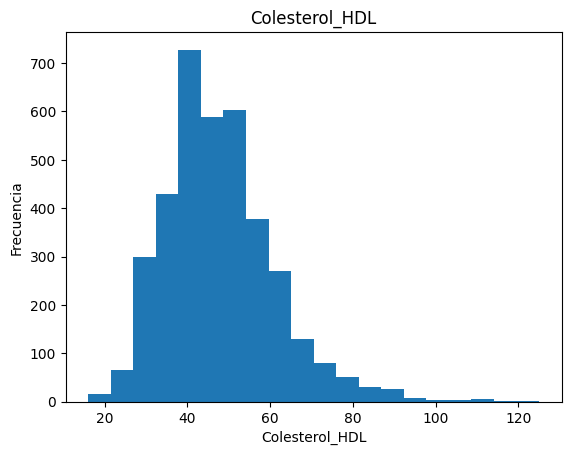

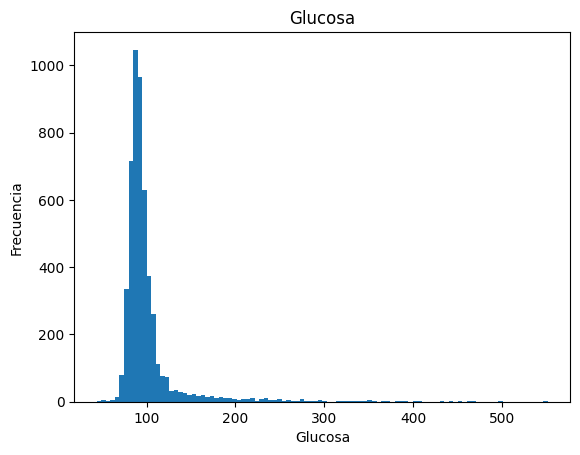

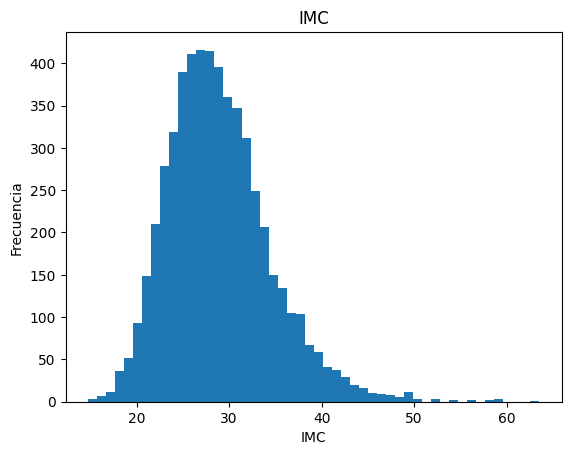

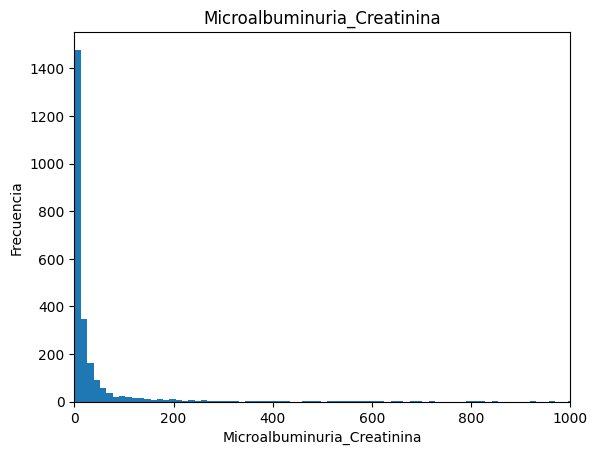

In [43]:
# <CODE>
variables = ['Edad', 'Colesterol_HDL', 'Glucosa', 'IMC', 'Microalbuminuria_Creatinina']

v = 'Edad'
fig = plt.figure()
plt.hist(ens[v],bins=40)
plt.title(v)
plt.xlabel(v)
plt.ylabel('Frecuencia')
plt.show()

v = 'Colesterol_HDL'
fig = plt.figure()
plt.hist(ens[v],bins=20)
plt.title(v)
plt.xlabel(v)
plt.ylabel('Frecuencia')
plt.show()

v = 'Glucosa'
fig = plt.figure()
plt.hist(ens[v],bins=100)
plt.title(v)
plt.xlabel(v)
plt.ylabel('Frecuencia')
plt.show()

v = 'IMC'
fig = plt.figure()
plt.hist(ens[v],bins=50)
plt.title(v)
plt.xlabel(v)
plt.ylabel('Frecuencia')
plt.show()

v = 'Microalbuminuria_Creatinina'
fig = plt.figure()
plt.hist(ens[v],bins=1000)
plt.title(v)
plt.xlabel(v)
plt.ylabel('Frecuencia')
plt.xlim([0, 1000])
plt.show()




Para evaluar si la variable distribuye normal, es necesario realize un test de hipotesis para verificar su distribución. Gran parte (si es que no todos) de los metodos para realizar test de hipotesis se encuentran implementados en Python. 

#### **Ejercicio 2** 

Utilizando el test de `Shapiro-Wilk` verifique si las variables antes mencionadas distribuyen normal. Debera buscar en internet que función puede utilizar para realizar el test. Recuerde mencionar si se rechaza o acepta la hipotesis nula (pvalue >0.05). Responda:

* De acuerdo a este resultado, ¿que variables distribuyen normal?



In [44]:
# <CODE>
from scipy.stats import shapiro


variables = ['Edad', 'Colesterol_HDL', 'Glucosa', 'IMC', 'Microalbuminuria_Creatinina']

for var in variables:
    stat, p = shapiro(ens[var].dropna())
    print(f'{var}: p={p} -> {"Normal" if p > 0.05 else "No normal"}')

Edad: p=1.6908373537795317e-32 -> No normal
Colesterol_HDL: p=7.142251582699447e-32 -> No normal
Glucosa: p=2.0695278415097308e-80 -> No normal
IMC: p=2.6034048901686587e-35 -> No normal
Microalbuminuria_Creatinina: p=1.4025837534342824e-74 -> No normal


#### **Ejercicio 3** 

Realize un Q-Q para cada una de las variables y analize que sucede en los extremos de este. Responda:
* ¿Que nos indican los resultados del plot?


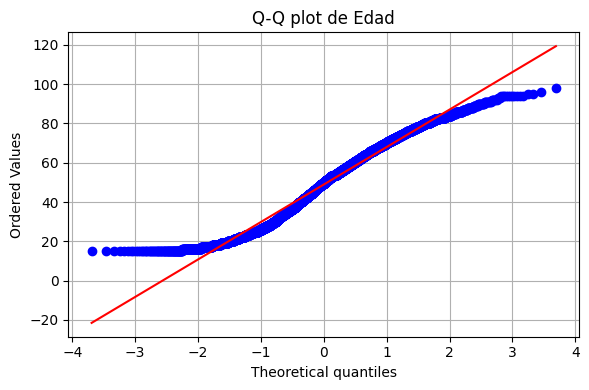

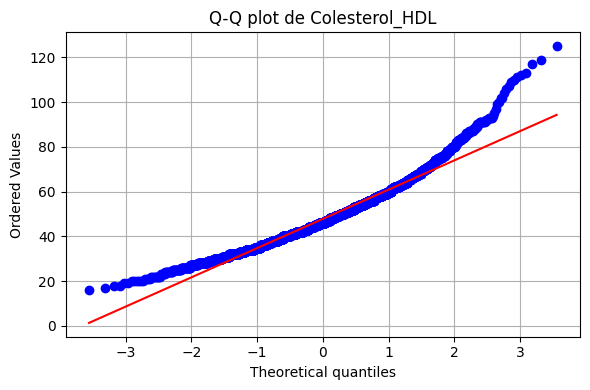

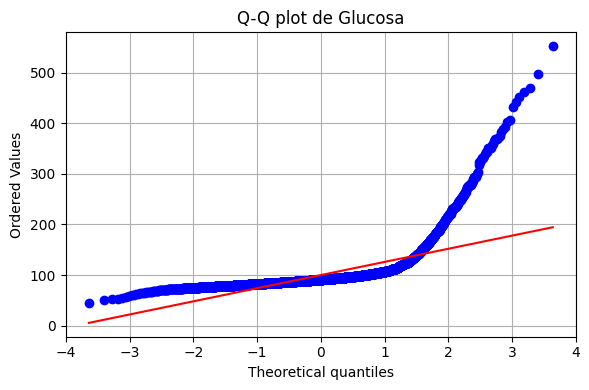

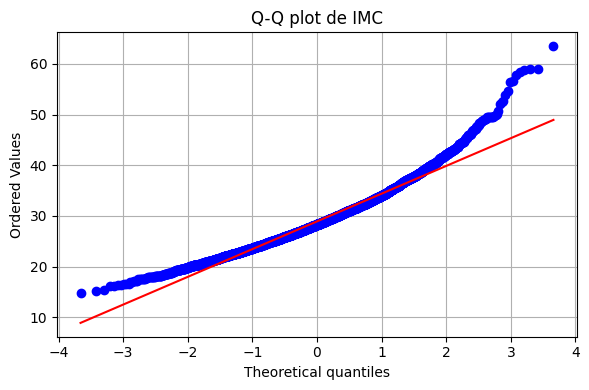

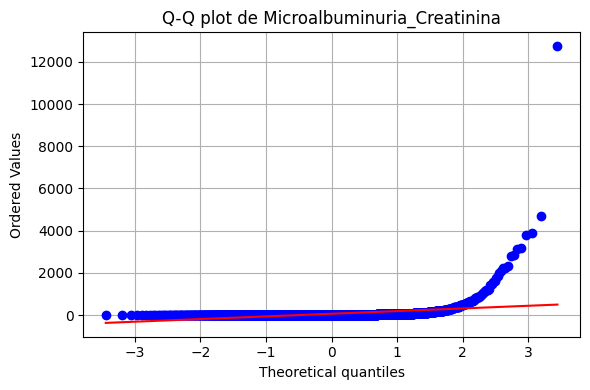

In [45]:
# <CODE>

variables = ['Edad', 'Colesterol_HDL', 'Glucosa', 'IMC', 'Microalbuminuria_Creatinina']

for var in variables:
    plt.figure(figsize=(6, 4))
    stats.probplot(ens[var].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q plot de {var}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## 4.1 Teorema del limite central (TLC)
El Teorema del Límite Central (TLC) es uno de los conceptos más fundamentales y poderosos de la estadística. Nos dice que:

> Si tomamos muchas muestras aleatorias de una población (de cualquier forma), y calculamos la media de cada muestra, esas medias estarán aproximadamente distribuidas normalmente, independientemente de la forma de la distribución original, siempre que el tamaño de la muestra sea suficientemente grande.

En otras palabras, incluso si los datos originales son sesgados, asimétricos o contienen valores atípicos, la distribución de las medias muestrales se vuelve cada vez más parecida a una campana (distribución normal) a medida que aumenta el tamaño de las muestras. Este fenómeno es clave porque permite aplicar técnicas estadísticas basadas en la normalidad, como intervalos de confianza o pruebas t, aun cuando la variable original no sea normal.



#### **Ejercicio 4** 
